In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib notebook

In [14]:
cols = ['index', 'time', 'move_description', 'set_point', 'measured_position']
df = pd.read_csv("tmclreport_2021-12-01-19-09-56.csv", header=0, names=cols)
df.head()

,index,time,move_description,set_point,measured_position
0,0,2021-12-01 19:10:11.221782,MOTOR_X moved -30 mm,442.0,"-0082.44,-82.4449"
1,0,2021-12-01 19:10:11.331123,MOTOR_X move -30mm for 6 cycles with speed50mm...,NaN,NaN
2,0,2021-12-01 19:10:14.739927,MOTOR_X moved -30 mm,412.0,"-0052.42,-52.4244"
3,0,2021-12-01 19:10:18.126893,MOTOR_X moved -30 mm,382.0,"-0022.49,-22.4931"
4,0,2021-12-01 19:10:21.532491,MOTOR_X moved -30 mm,352.0,"+0007.43,+07.4348"


In [15]:
df['measured_position'].iloc[0]

'-0082.44,-82.4449'

In [16]:
df['time'] = pd.to_datetime(df['time'])
df = df.dropna()
df['position'] = [float(a.split(",")[1]) for a in df['measured_position']]
df.head()

,index,time,move_description,set_point,measured_position,position
0,0,2021-12-01 19:10:11.221782,MOTOR_X moved -30 mm,442.0,"-0082.44,-82.4449",-82.4449
2,0,2021-12-01 19:10:14.739927,MOTOR_X moved -30 mm,412.0,"-0052.42,-52.4244",-52.4244
3,0,2021-12-01 19:10:18.126893,MOTOR_X moved -30 mm,382.0,"-0022.49,-22.4931",-22.4931
4,0,2021-12-01 19:10:21.532491,MOTOR_X moved -30 mm,352.0,"+0007.43,+07.4348",7.4348
5,0,2021-12-01 19:10:24.911221,MOTOR_X moved -30 mm,322.0,"+0037.43,+37.4305",37.4305


In [17]:
unique_locations = df['set_point'].unique()

<IPython.core.display.Javascript object>


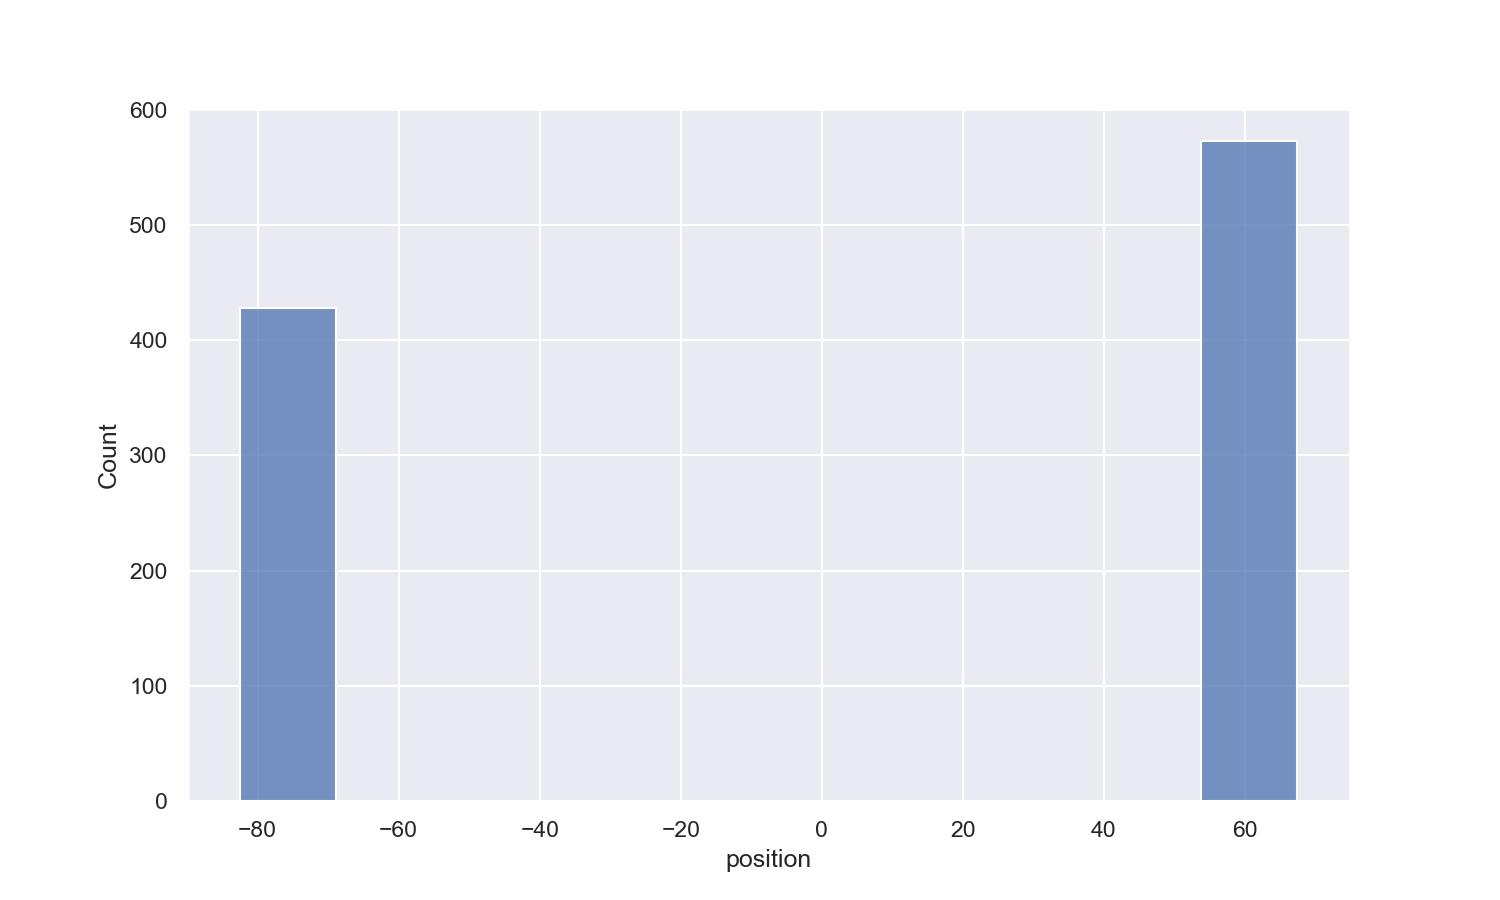

<IPython.core.display.Javascript object>


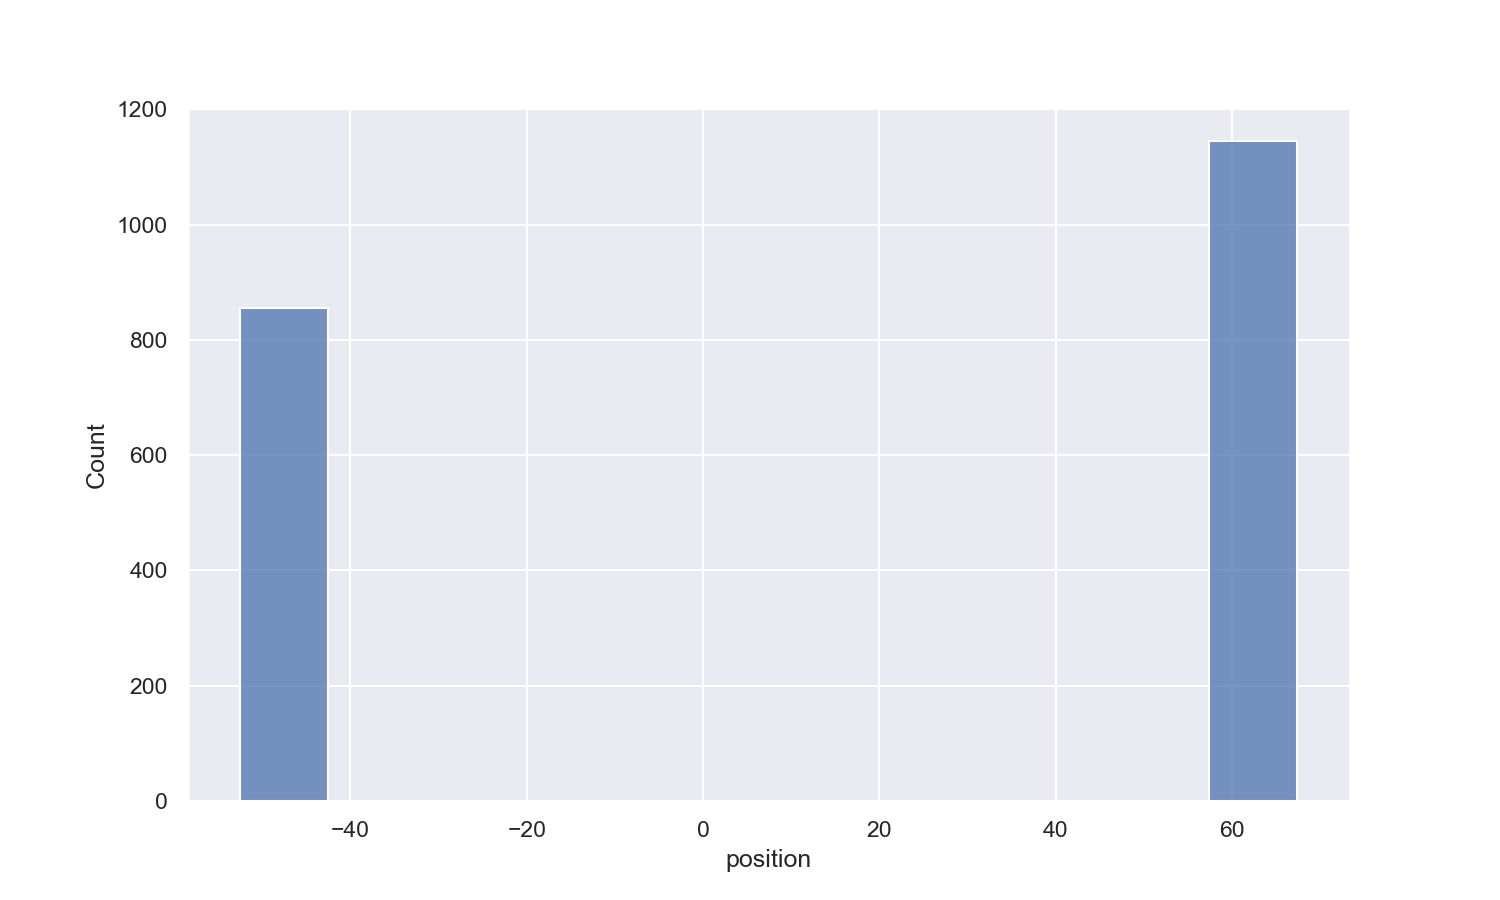

<IPython.core.display.Javascript object>


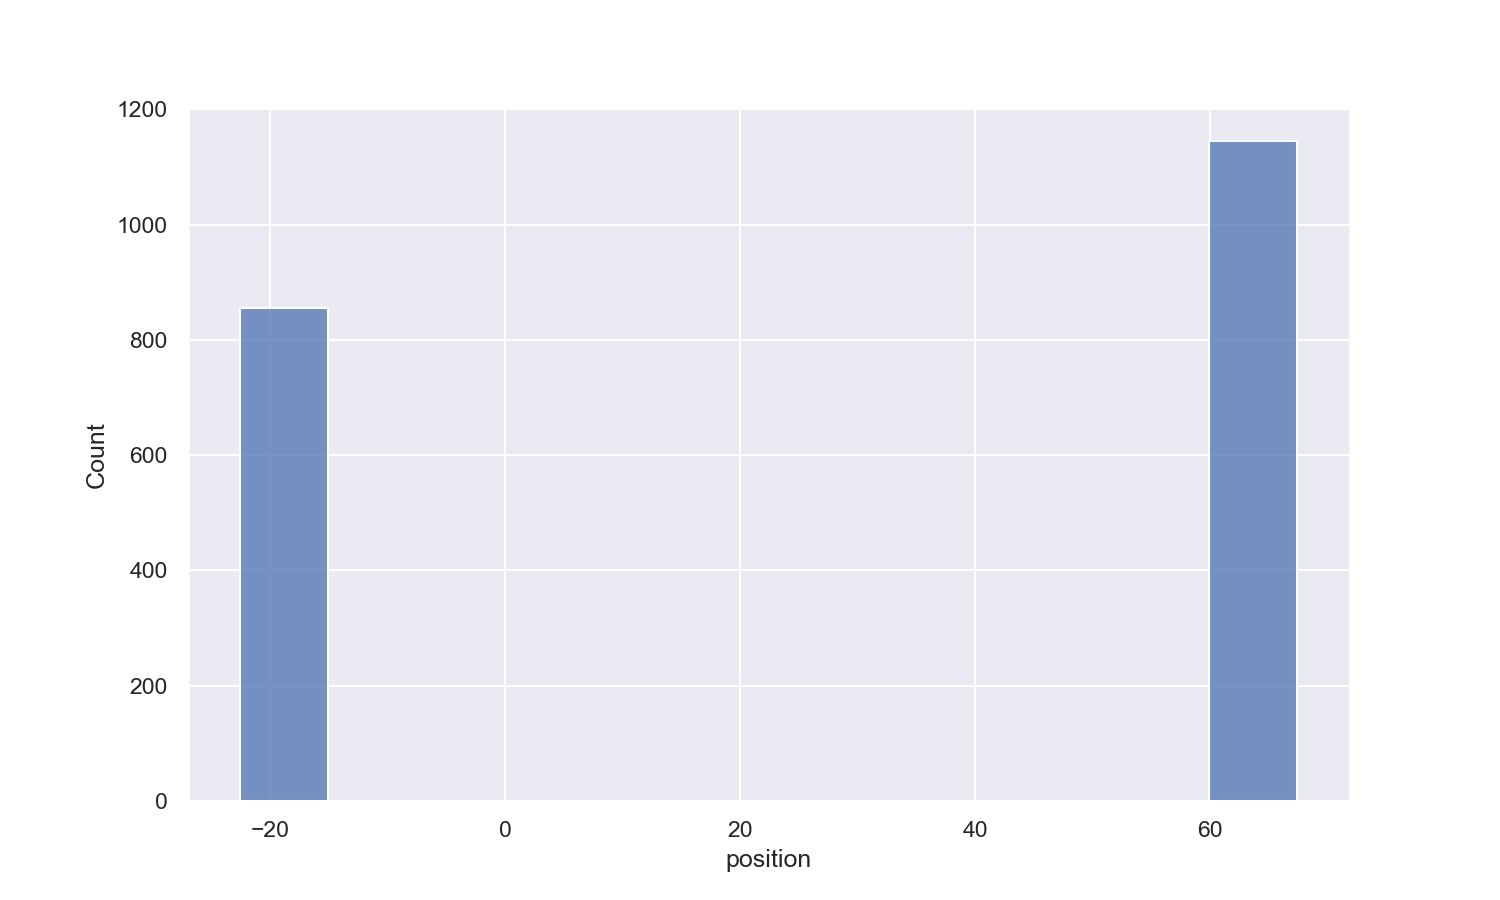

<IPython.core.display.Javascript object>


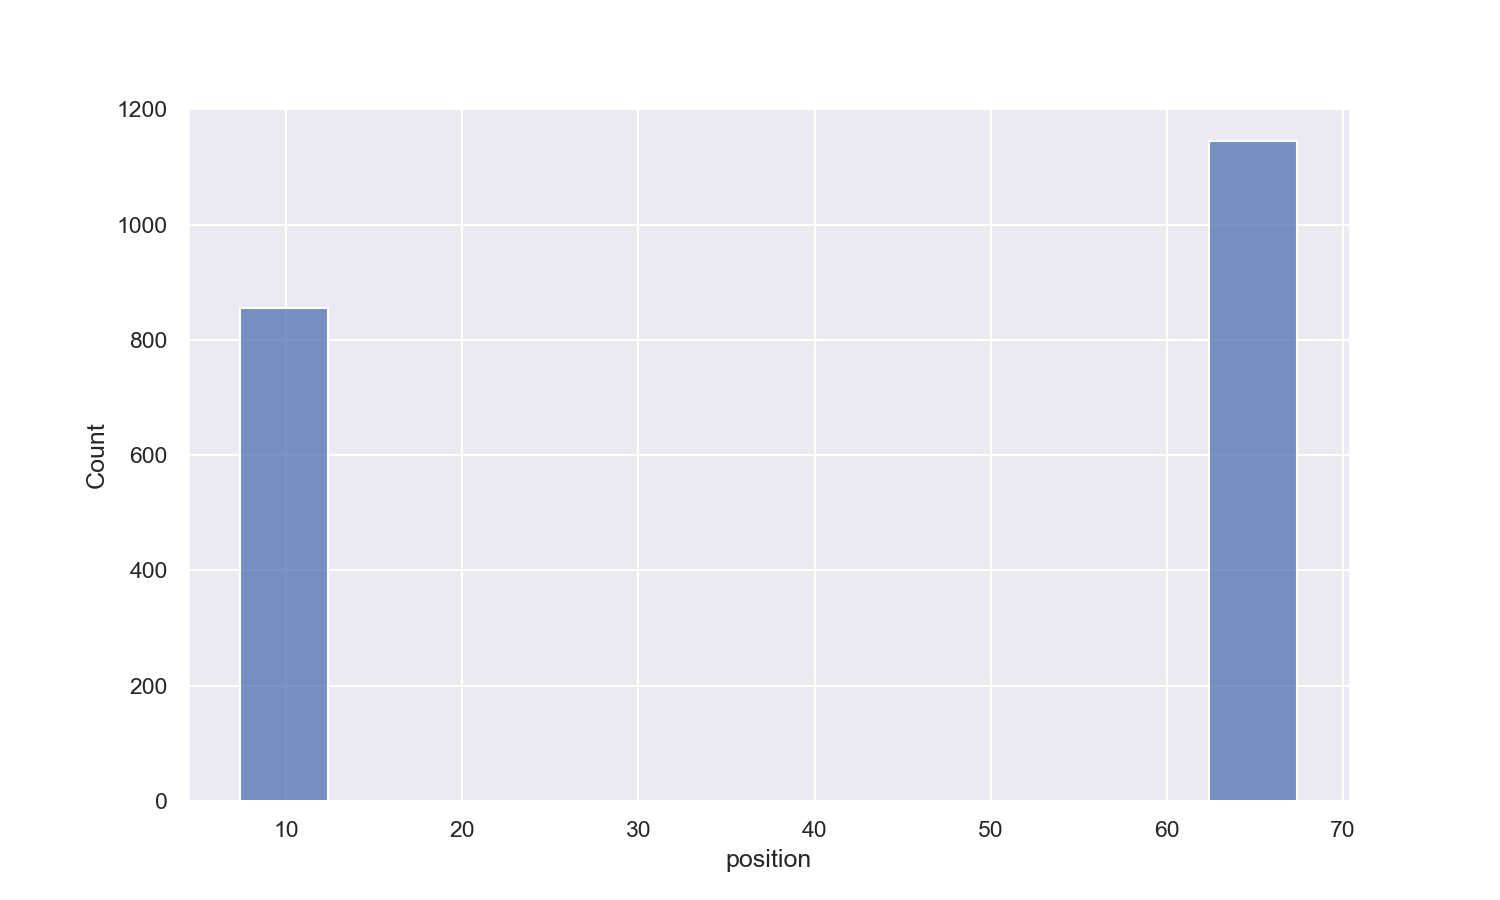

<IPython.core.display.Javascript object>


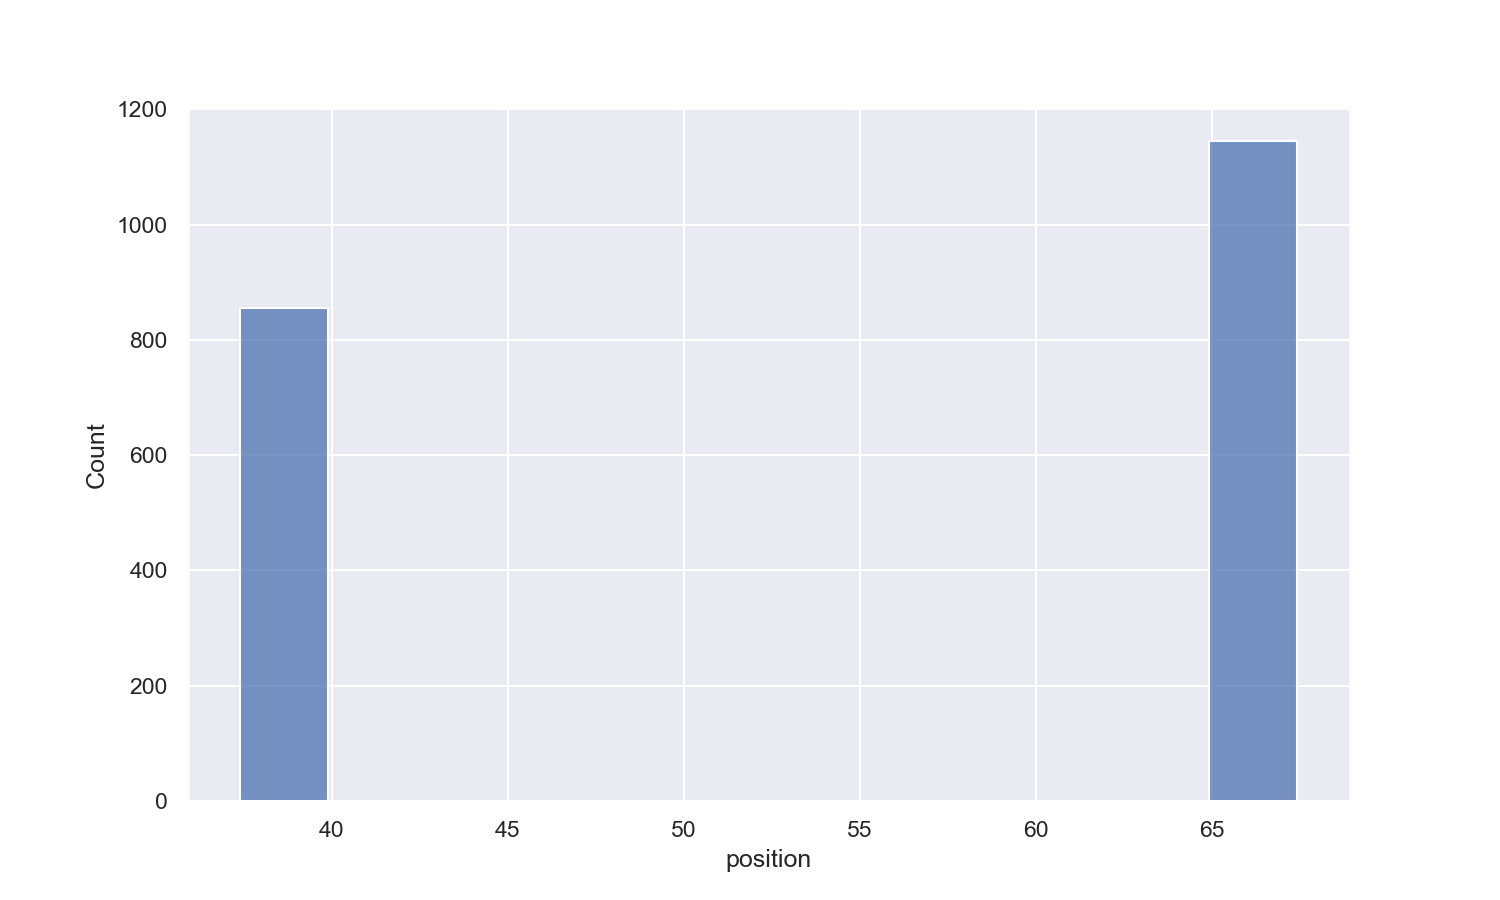

<IPython.core.display.Javascript object>


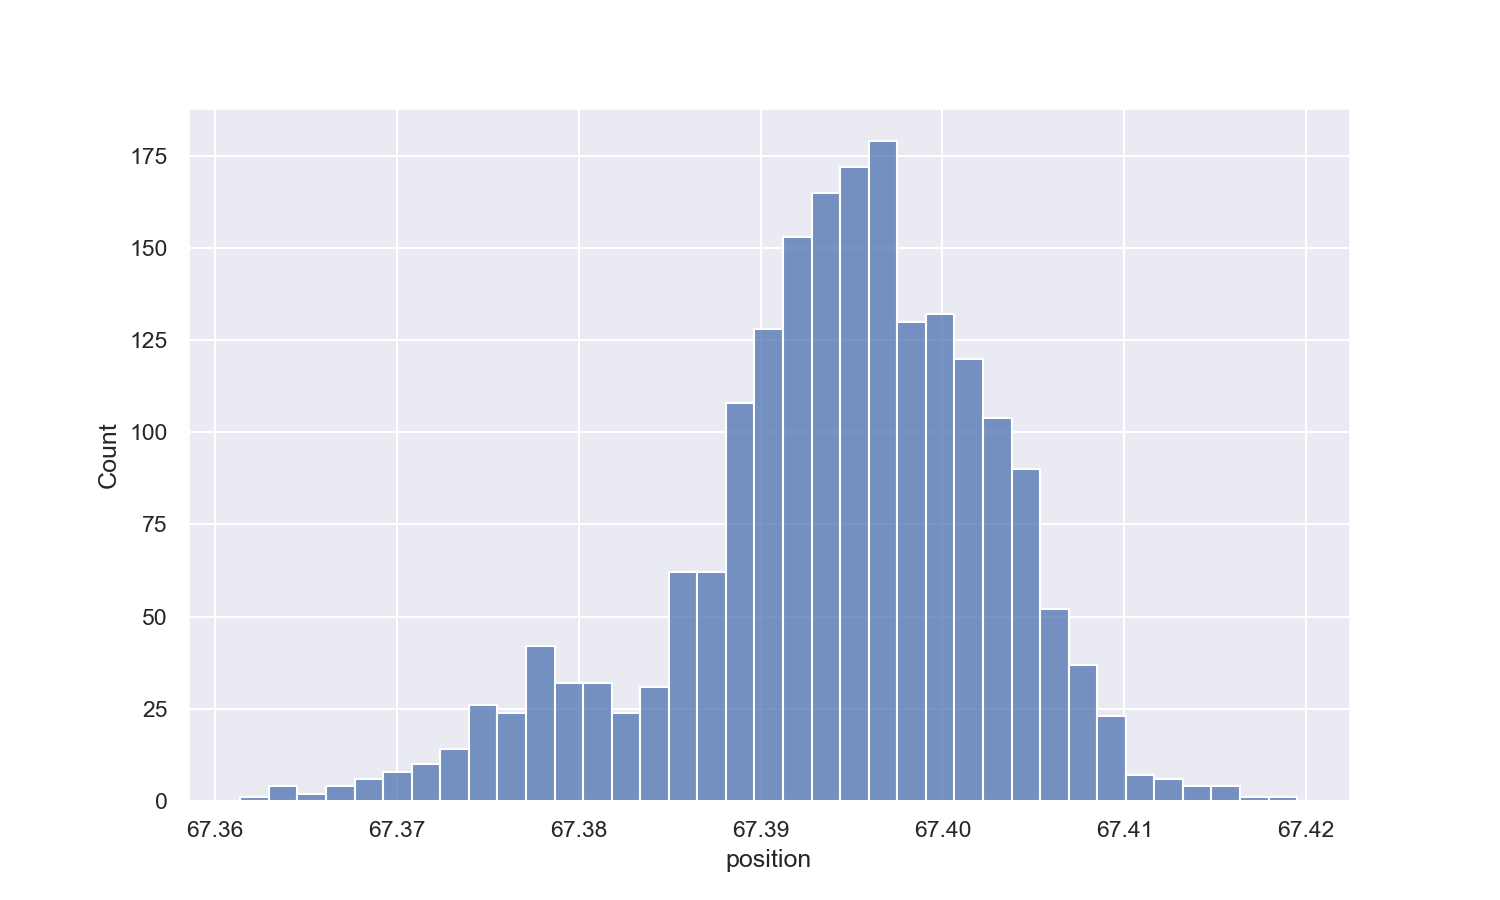

<IPython.core.display.Javascript object>


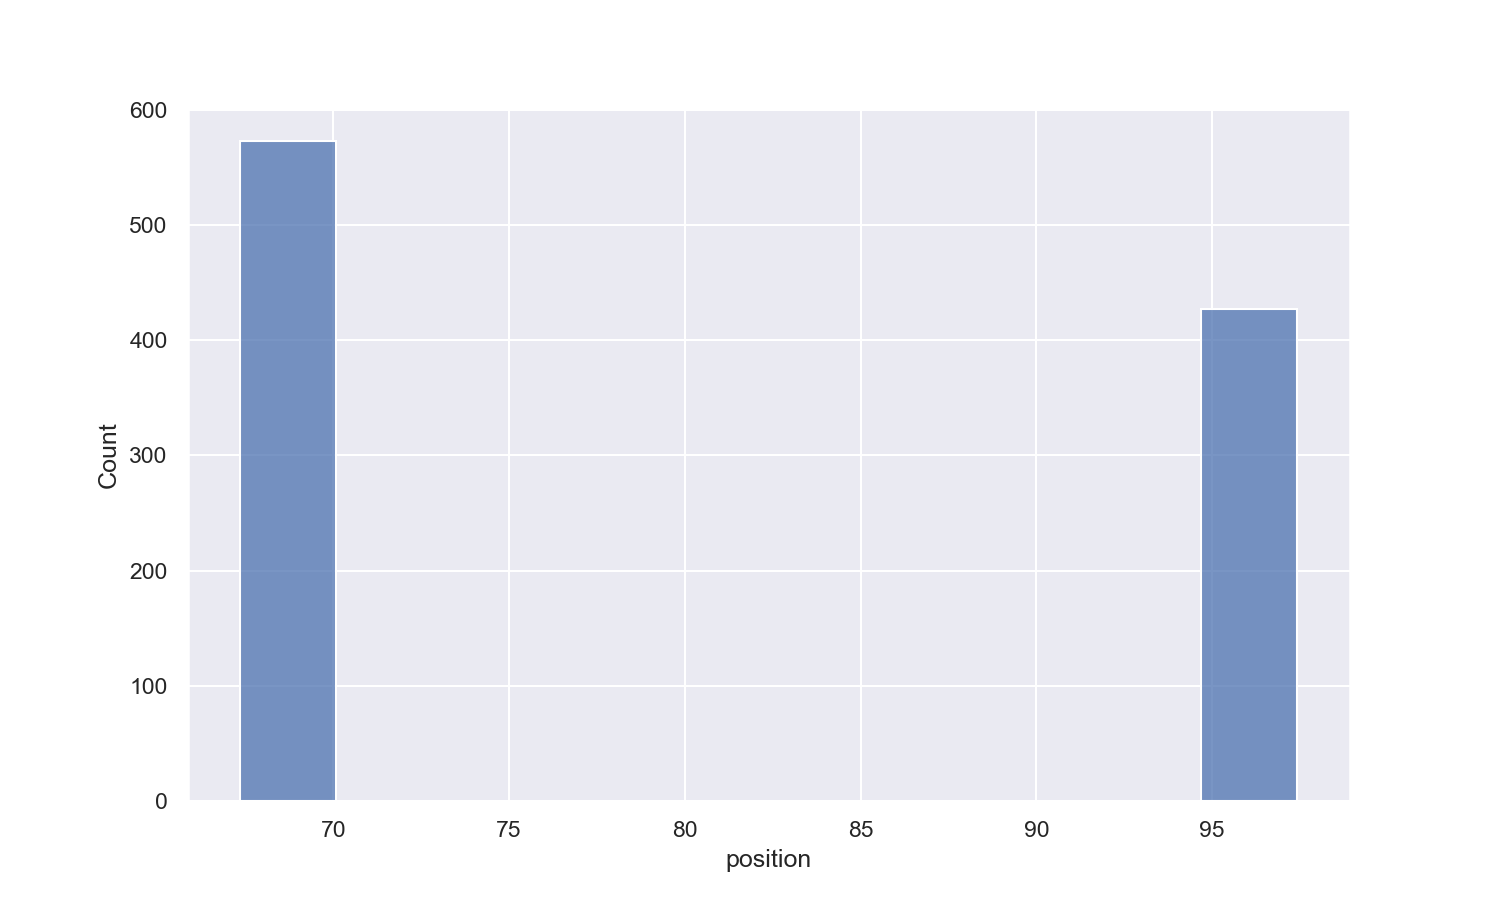

In [18]:
for location in unique_locations:
    temp_df = df.loc[df['set_point'] == location].copy()
    fig, ax = plt.subplots(figsize=(10, 6))
    sns.histplot(temp_df['position'])
    plt.show()

<IPython.core.display.Javascript object>


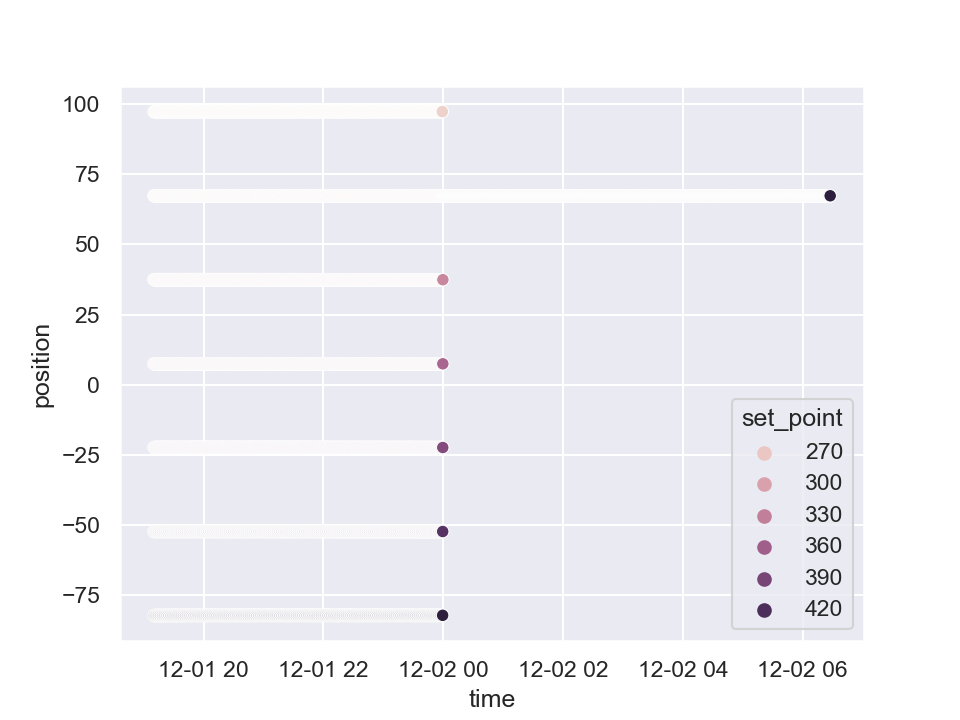

<AxesSubplot:xlabel='time', ylabel='position'>

In [19]:
fig, ax = plt.subplots()
sns.scatterplot(data=df, x='time', y='position', hue='set_point')

In [20]:
cutoff = pd.to_datetime('2021-12-01 23:00:00.000000')

In [21]:
df = df.loc[df['time'] < cutoff].copy()

<IPython.core.display.Javascript object>


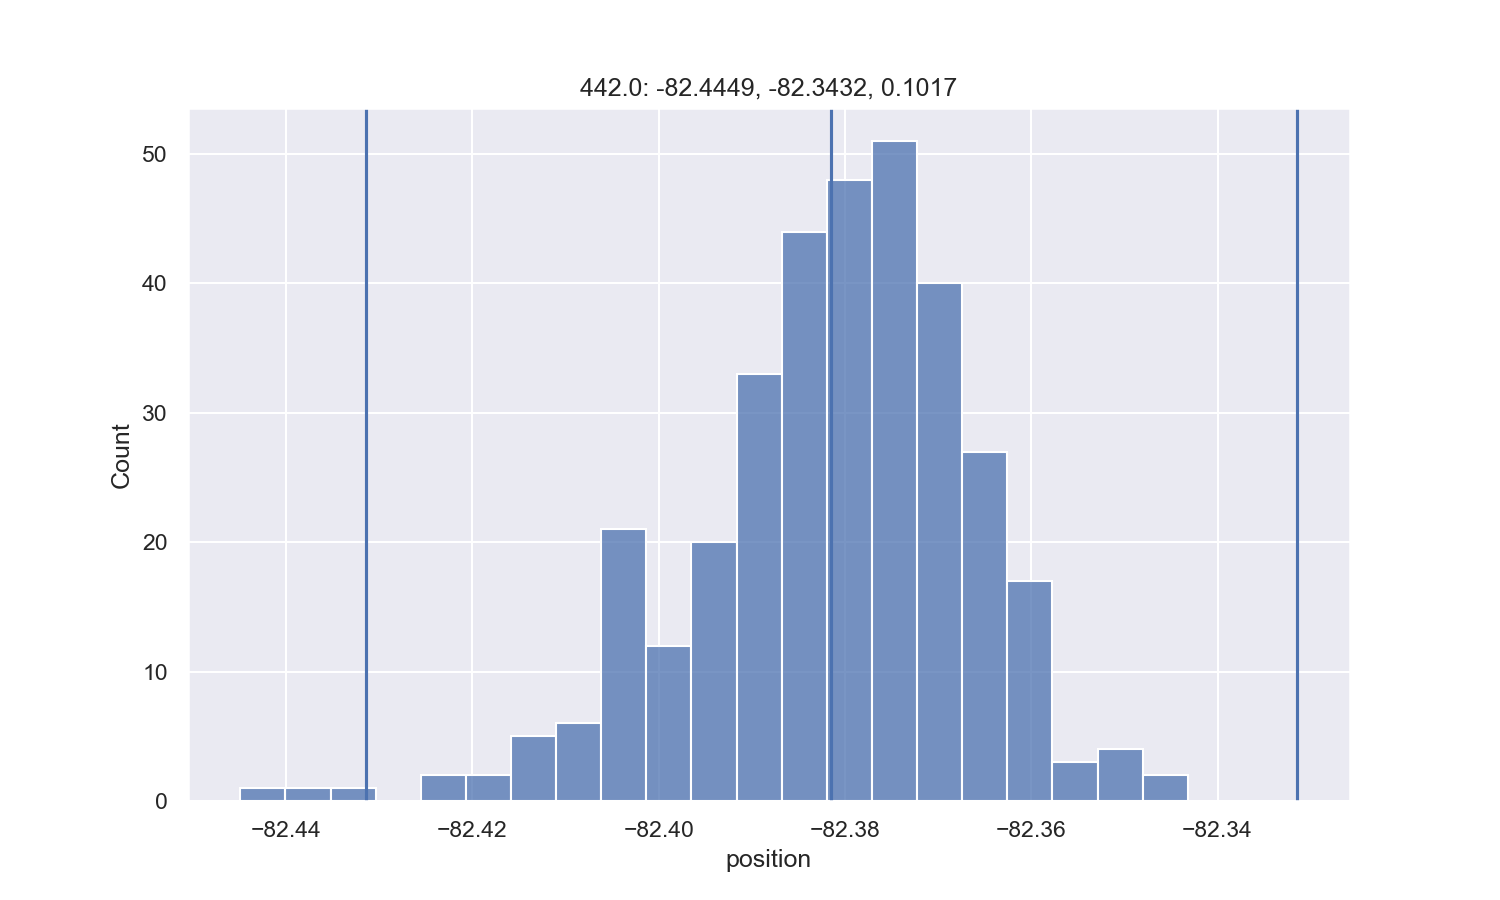

<IPython.core.display.Javascript object>


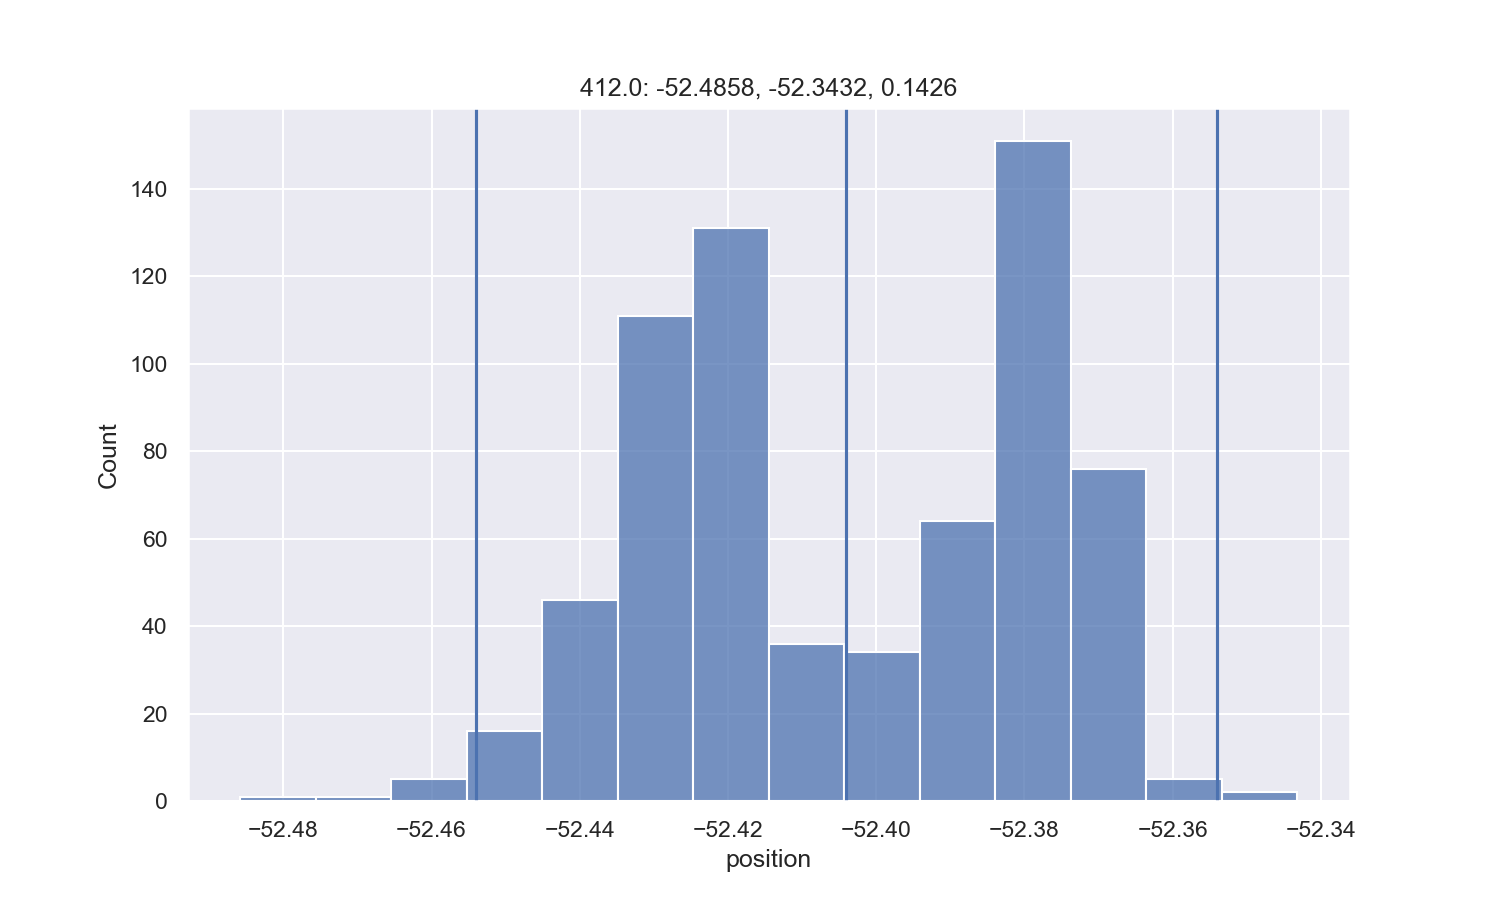

<IPython.core.display.Javascript object>


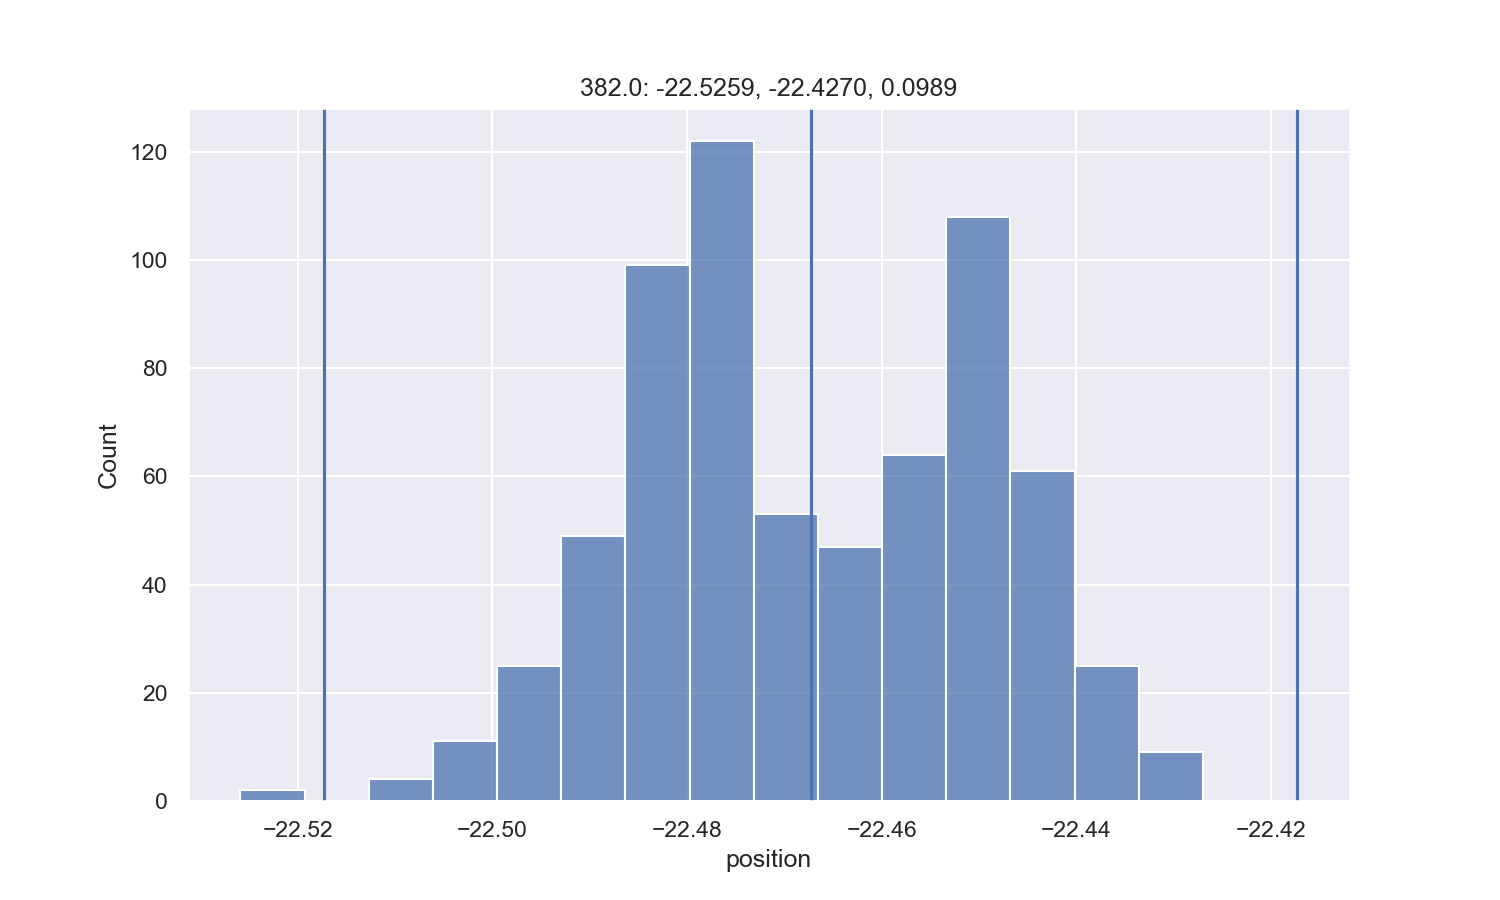

<IPython.core.display.Javascript object>


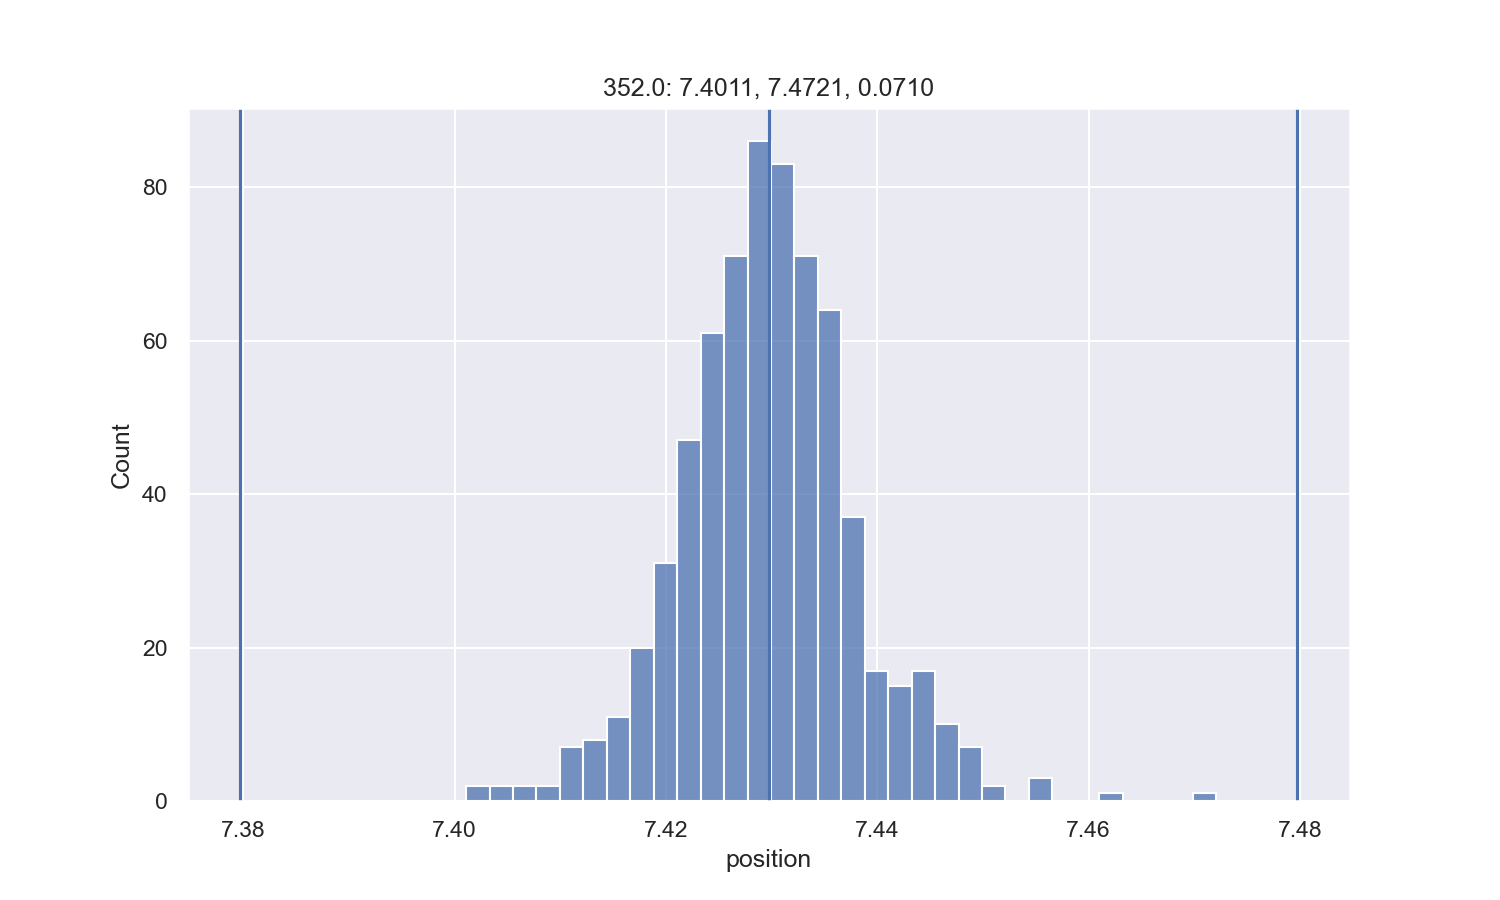

<IPython.core.display.Javascript object>


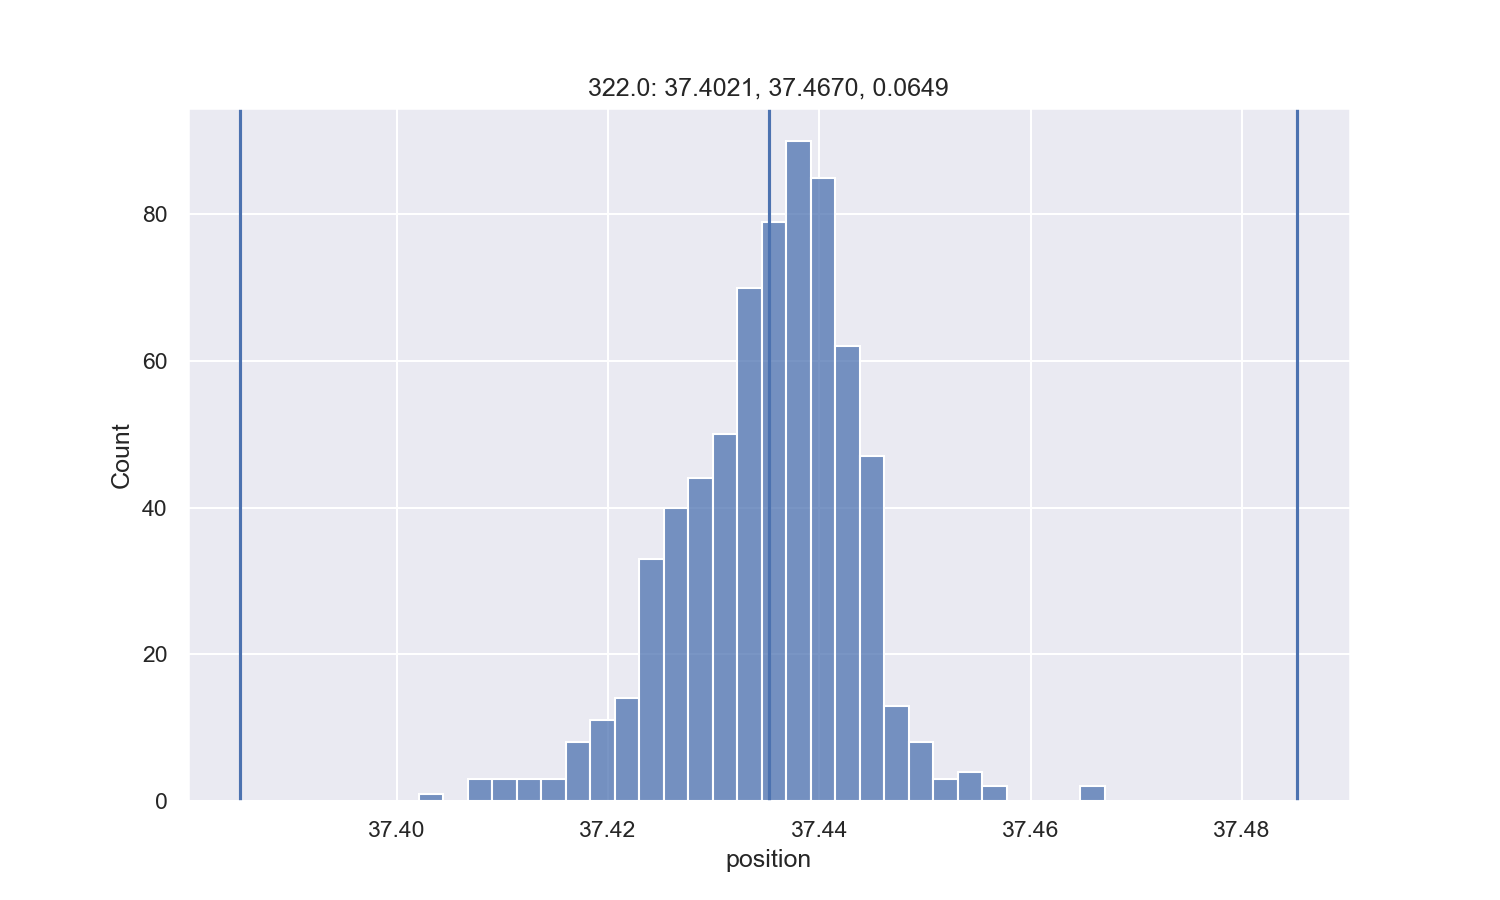

<IPython.core.display.Javascript object>


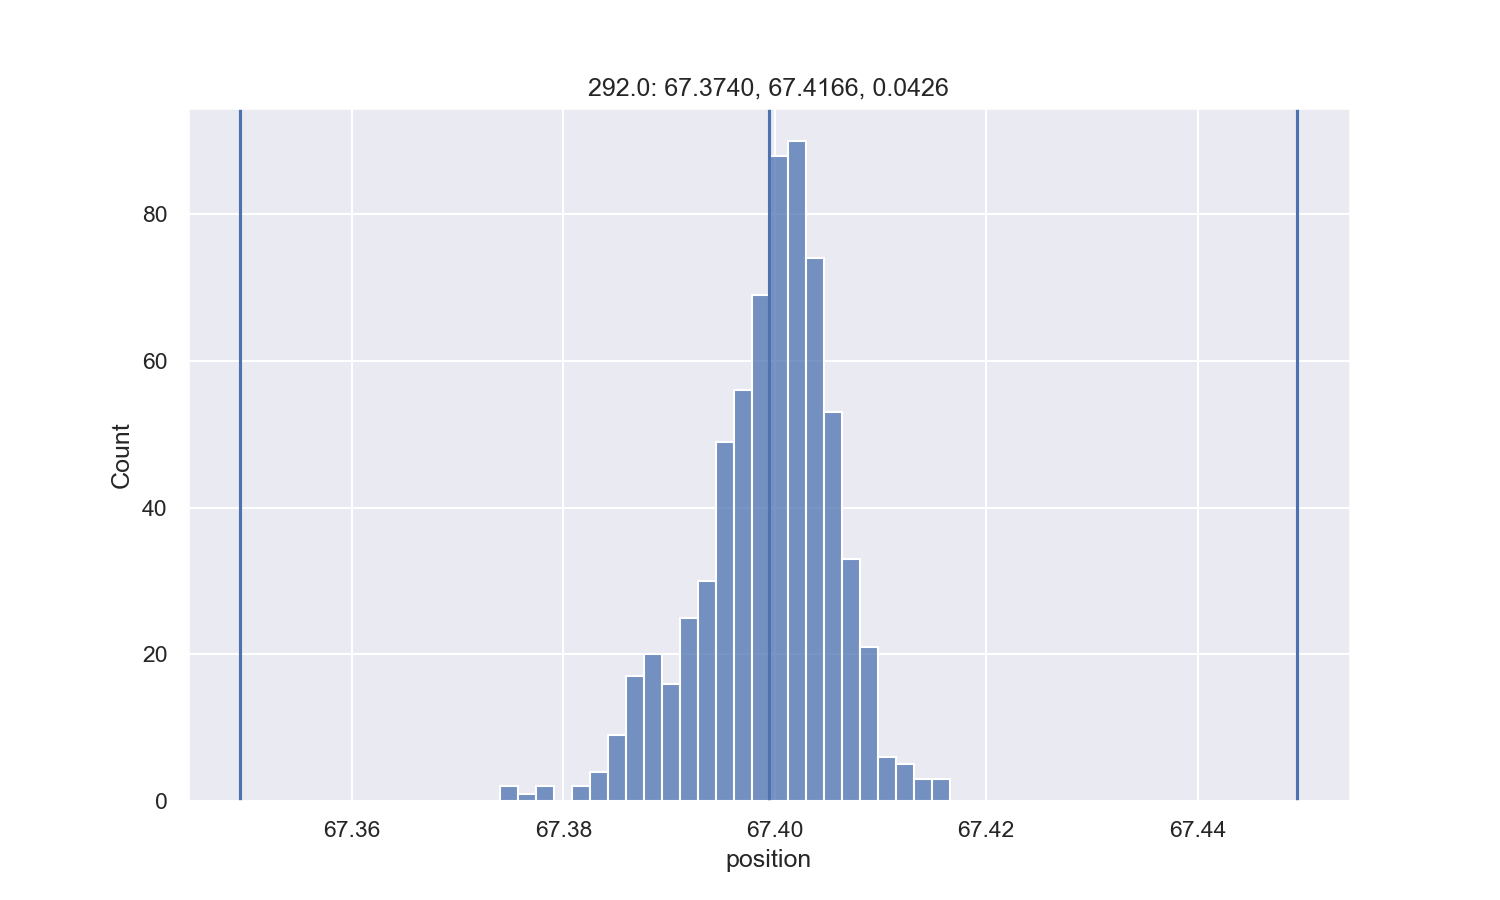

<IPython.core.display.Javascript object>


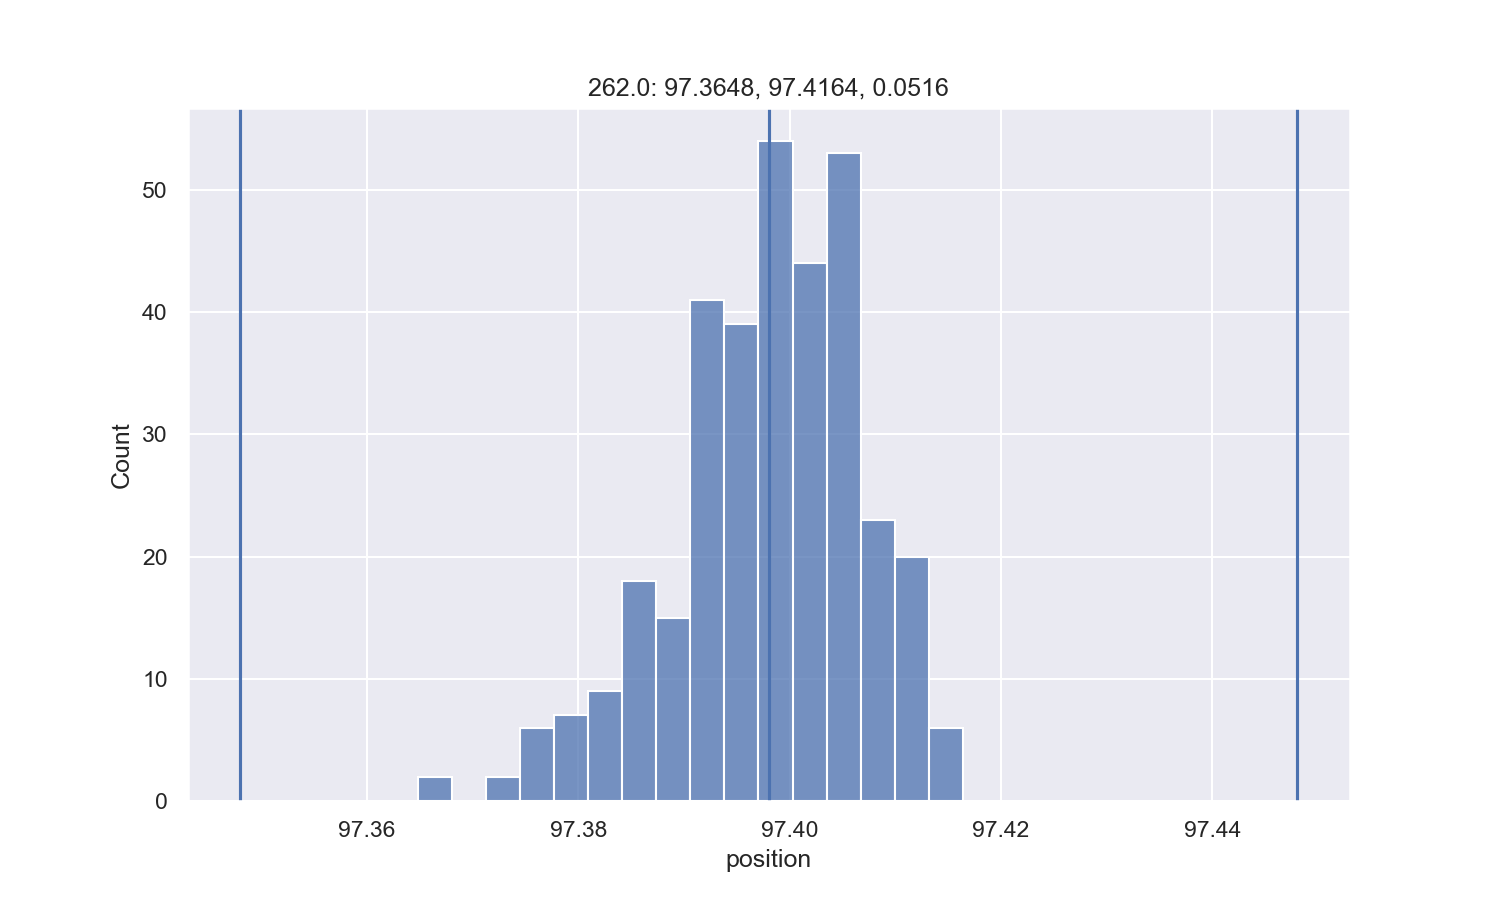

In [22]:
for location in unique_locations:
    temp_df = df.loc[df['set_point'] == location].copy()
    fig, ax = plt.subplots(figsize=(10, 6))
    sns.histplot(temp_df['position'])
    maximum = temp_df['position'].max()
    minimum = temp_df['position'].min()
    mean = temp_df['position'].mean()
    requirement = 0.05
    span = maximum - minimum
    ax.axvline(mean - requirement)
    ax.axvline(mean + requirement)
    ax.axvline(mean)
    ax.set(title='{}: {:.4f}, {:.4f}, {:.4f}'.format(location, minimum, maximum, span))
    plt.show()

<IPython.core.display.Javascript object>


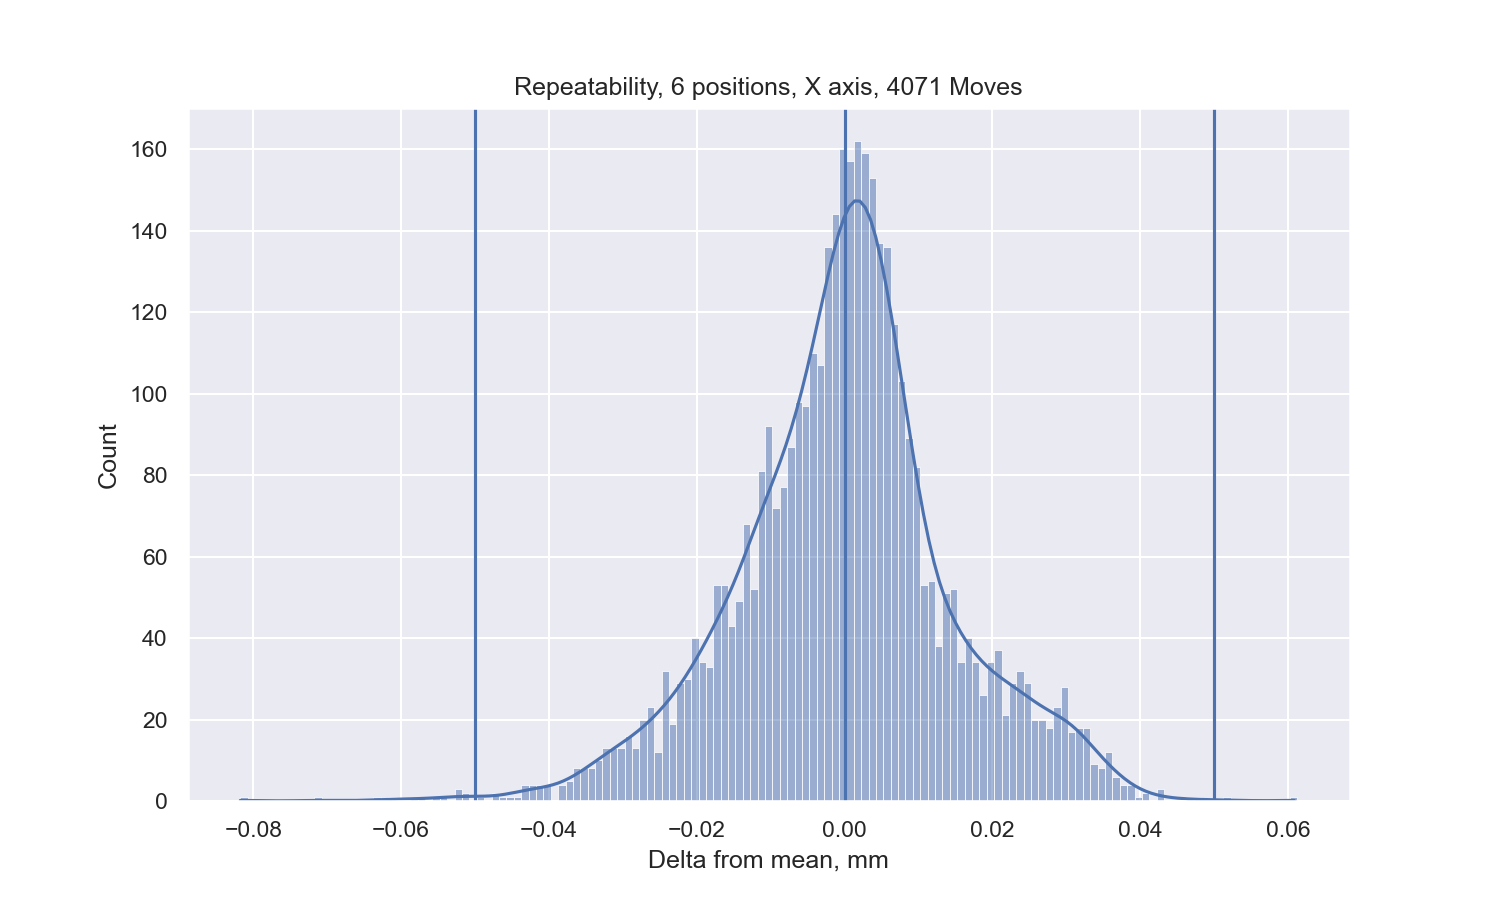

In [24]:
fig, ax = plt.subplots(figsize=(10, 6))

offsets = []

for location in unique_locations:
    temp_df = df.loc[df['set_point'] == location].copy()
    mean = temp_df['position'].mean()
    offsets.append(mean)
    
offset_dict = dict(zip(unique_locations, offsets))
df['delta'] = [a[0] - offset_dict[a[1]] for a in df[['position', 'set_point']].to_numpy()]

sns.histplot(df['delta'], binwidth=0.001, kde=True)
requirement = .05
span = maximum - minimum
ax.axvline(-requirement)
ax.axvline(requirement)
ax.axvline(0)
ax.set(xlabel=r'Delta from mean, mm', title='Repeatability, 6 positions, X axis, {} Moves'.format(df.shape[0]))
plt.show()